### Implementing Term Frequency - Inverse Document Frequency (TF-IDF) with Multinomial Naive Bayes, Random Forest, and Logistic Regression

### Exploring the Dataset

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
input_file = 'test_CNN_Article.xlsx'
df = pd.read_excel(input_file)
df.head(10)

,text,label
0,"(CNN)Kenya Goodson, a 46-year-old Black woman...",0
1,Story highlightsUK PM David Cameron promises t...,0
2,(CNN)Additional testing is planned after Kent...,0
3,Sign up for CNN's Wonder Theory science newsle...,0
4,London (CNN)Team GB sprinter Bianca Williams h...,0
5,(CNN)One of the two police officers hospitali...,0
6,London (CNN)Boris Johnson's embattled chief ai...,0
7,(CNN)Cardinal Raymond Leo Burke has been hosp...,0
8,Story highlightsKamau Bell: We need to hear sp...,0
9,Story highlightsBuffon has three different lin...,0


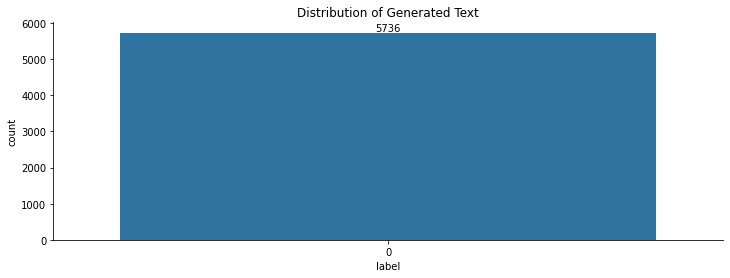

In [5]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

#### The above dataframe only contains the published CNN articles (written by humans) and have label = 0

In [8]:
generated_input_file = 'Generated data.xlsx'
df_generated = pd.read_excel(generated_input_file)
df_generated.head(10)

,text,label
0,Story highlights 'Standing man' inspires new p...,1
1,(CNN)A Black couple's lawsuit against a home ...,1
2,(CNN)Despite early efforts to keep inmates an...,1
3,(CNN)Miami could be hosting a Formula One rac...,1
4,Story highlightsDay pulls out of WGC Match Pla...,1
5,(CNN)When Son Heung-Min fired home Tottenham'...,1
6,"(CNN)Ten months ago, Pierre Gasly was just gr...",1
7,Story highlightsAhmed Merabet is reportedly a ...,1
8,"Pittsburgh (CNN)The rabbi lies awake at night,...",1
9,Story highlightsImages of Edinburgh's Giles St...,1


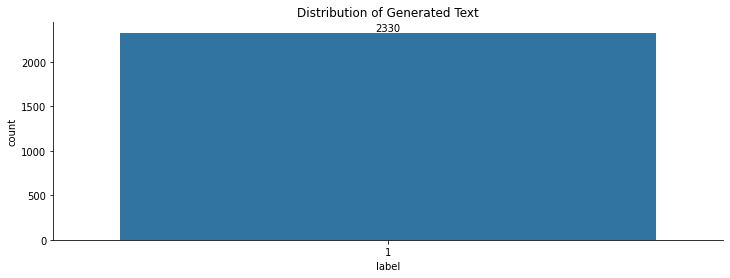

In [9]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df_generated, x="label")

abs_values = df_generated['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

#### Since my generated data only contains 2300 rows, I will randomly select 3000 rows from the original CNN dataset and concatenate with the generated data

In [11]:
def count_words(text):
    return len(text.split())

# Filter rows where the first column has fewer than 6 words
# Some cells only have "CNN" written in them
df = df[df.iloc[:, 0].apply(count_words) >= 6]

# Randomly sample 3000 rows from the filtered DataFrame
if len(df) >= 3000:
    df_sampled = df.sample(n=3000, random_state=42)
else:
    print("Not enough data to sample 3000 rows. Sampling all available rows instead.")
    df_sampled = df
    
# Ensure both dataframes have the same columns in the same order
df_generated = df_generated[df_sampled.columns]

df_concatenated = pd.concat([df_sampled, df_generated], ignore_index=True, sort=False)

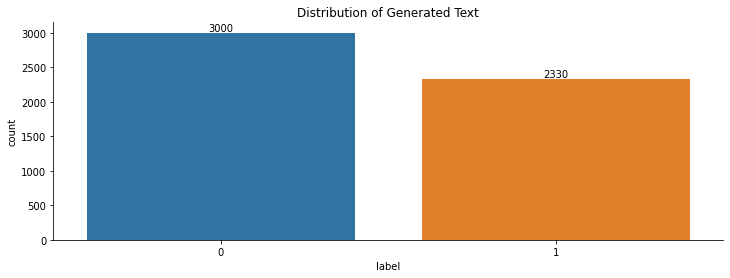

In [12]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df_concatenated, x="label")

abs_values = df_concatenated['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [17]:
# Shuffling the data
shuffled_data = df_concatenated.sample(frac=1, random_state=21)

In [18]:
shuffled_data.head()

,text,label
275,"(CNN)She's 37 and a mom, but Serena Williams ...",0
3985,(CNN)One person was killed and two were injur...,1
3442,(CNN)Usain Bolt has tested positive for the c...,1
622,(CNN)With another couple of swishes of that m...,0
5127,(CNN)Virtually unbeatable on the clay at the ...,1


### Implementation of TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_data["text"])
Y = shuffled_essays_data["label"]

In [21]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    )

In [22]:
np.size(y_train)

3997

In [23]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 738
Number of 1s: 595


### Multinomial NaiveBayes Classifier

In [24]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [25]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [26]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.57
Precision: 1.00
Recall: 0.03


### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [28]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.80
Precision: 0.82
Recall: 0.70


In [29]:
# Changing the number of tree and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.88
Precision: 0.89
Recall: 0.83


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.85
Precision: 0.93
Recall: 0.72
